# EDA with Data Visualization - Car Crashes Dataset


## About the Notebook

This notebook analyzes various features of Seaborn Library for Data Visulaization using Car Crashes data. The data consists of the following variables:

'total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses', 'abbrev'

Following information/ visuals are included in the notebook:
* States and No. of drivers involved in fatal collisions per billion miles
* States and Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
* Highest percentage of drivers involved in fatal collisions who were alcohol-impaired
* Highest number of drivers involved in fatal collisions per billion miles 
* Percentage of incidents which involved alcohol in total number of drivers involved in fatal collisions per billion miles
* Highest Correlation of total incidents with other attributes
* Effect of percentage of drivers involved in fatal collisions who were not distracted 
* Effect of alcohol in the fatal collisions and drivers with no previous accidents

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('car_crashes')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [4]:
data = pd.read_csv('states_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   abbrev  51 non-null     object
 2   code    51 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [5]:
s = df.abbrev.replace(data.set_index('code')['state'])
df['State']=s

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
 8   State           51 non-null     object 
dtypes: float64(7), object(2)
memory usage: 3.7+ KB


In [7]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,State
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,Alabama
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,Alaska
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,Arizona
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,Arkansas
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,California


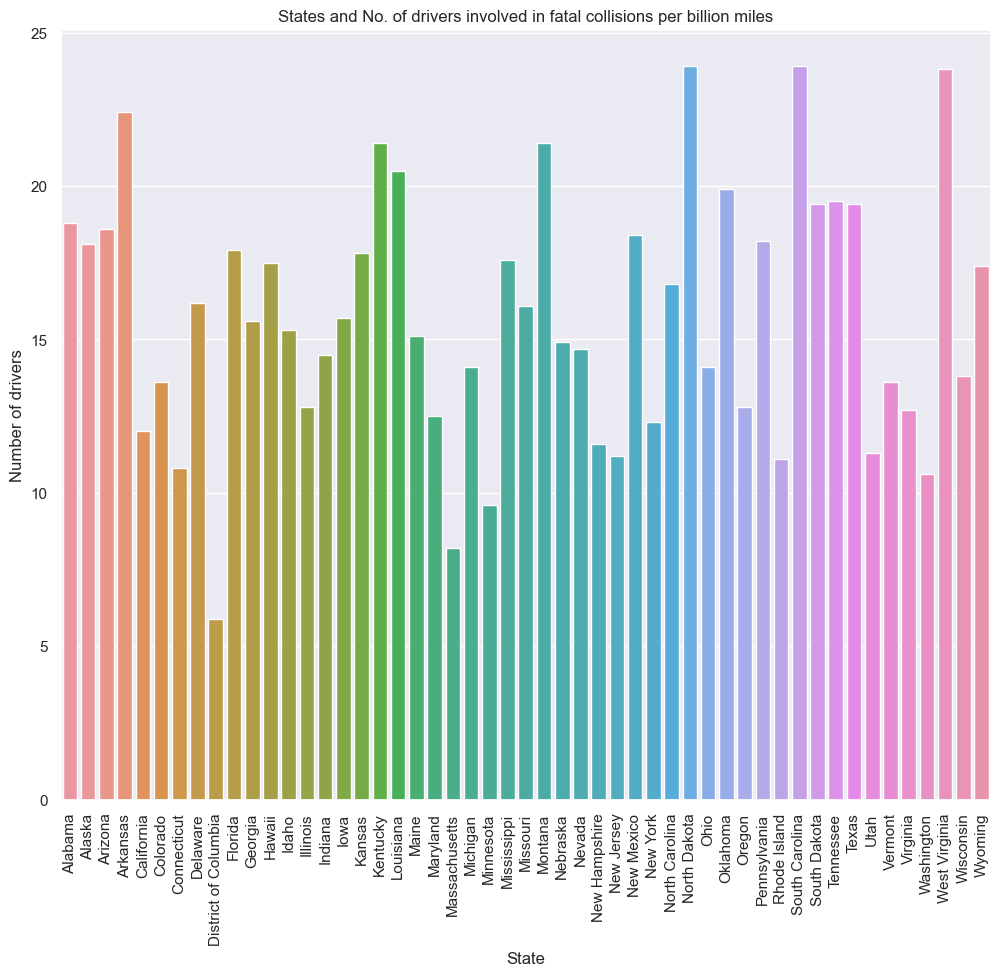

In [8]:
sns.set_theme()

fig = plt.figure(figsize = (12,10))
sns.barplot(data = df , x = 'State', y ='total')
plt.ylabel('Number of drivers')
plt.xlabel('State')
plt.title('States and No. of drivers involved in fatal collisions per billion miles')
plt.xticks(rotation = 90)

plt.show()

In [9]:
df.iloc[df['total'].idxmax()]

total                     23.9
speeding                 5.497
alcohol                 10.038
not_distracted          23.661
no_previous             20.554
ins_premium             688.75
ins_losses              109.72
abbrev                      ND
State             North Dakota
Name: 34, dtype: object

In [10]:
df[df['State']=='South Carolina']

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,State
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC,South Carolina


The highest number of drivers involved in fatal collisions per billion miles was **North Dakota** with 23.9 drivers. This is followed by **South Carolina** with 23.9 drivers

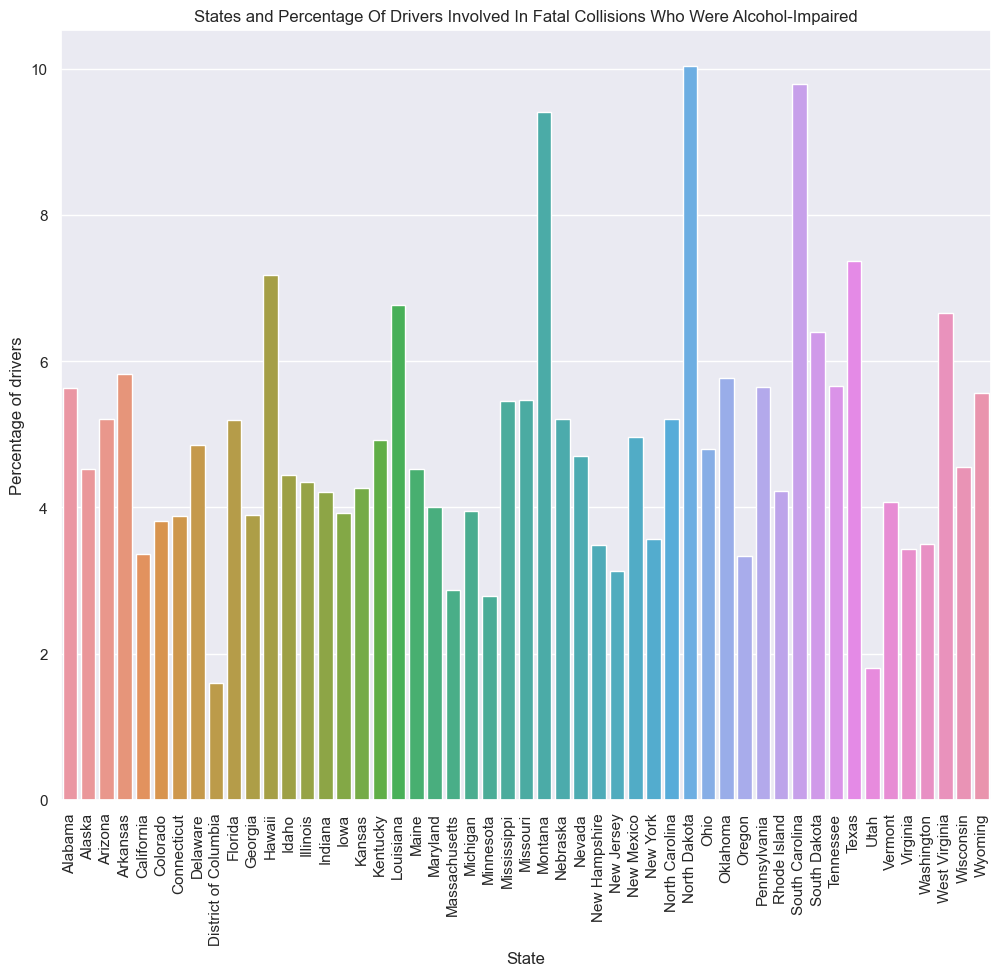

In [11]:
fig = plt.figure(figsize = (12,10))
sns.barplot(data = df , x = 'State', y ='alcohol')
plt.ylabel('Percentage of drivers')
plt.xlabel('State')
plt.title('States and Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
plt.xticks(rotation = 90)

plt.show()

In [12]:
df.iloc[df['alcohol'].idxmax()]

total                     23.9
speeding                 5.497
alcohol                 10.038
not_distracted          23.661
no_previous             20.554
ins_premium             688.75
ins_losses              109.72
abbrev                      ND
State             North Dakota
Name: 34, dtype: object


**North Dakota** had the highest percentage of drivers involved in fatal collisions who were alcohol-impaired. This is followed by **South Carolina**

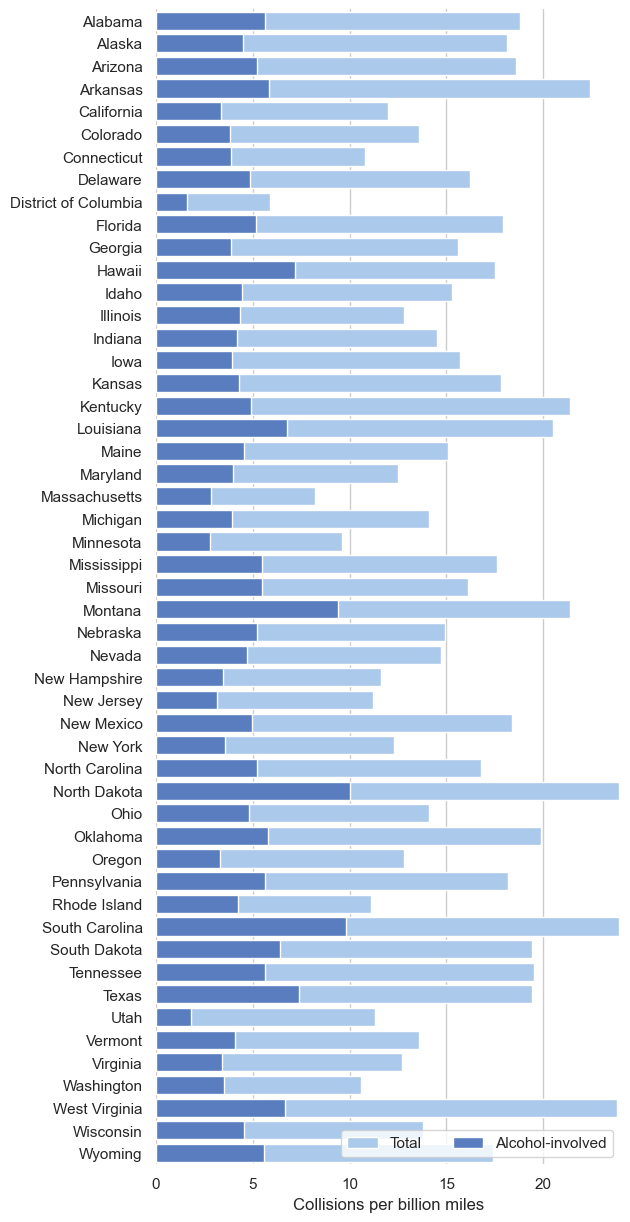

In [13]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(data = df, x="total", y="State", label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(data = df, x="alcohol", y="State", label="Alcohol-involved", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Collisions per billion miles")
sns.despine(left=True, bottom=True)

The above bar chart shows percentage of incidents which involved alcohol in total number of drivers involved in fatal collisions per billion miles

In [14]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


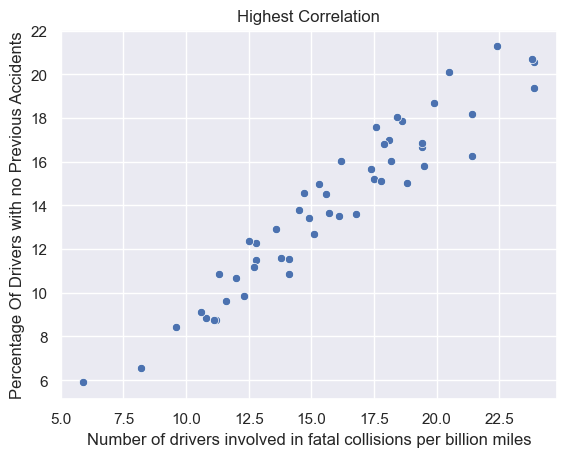

In [15]:
sns.set_theme()
sns.scatterplot(data=df, x='total', y='no_previous')
plt.ylabel('Percentage Of Drivers with no Previous Accidents')
plt.xlabel('Number of drivers involved in fatal collisions per billion miles')
plt.title('Highest Correlation')
plt.show()

Lets add the effect of alcohol in the fatal collisions and drivers with no previous accidents

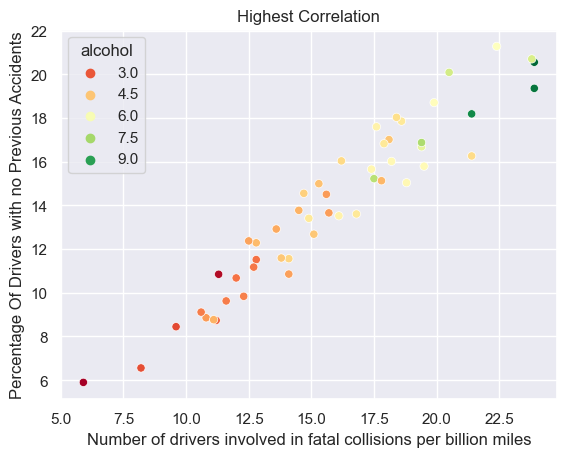

In [16]:
sns.set_theme()
sns.scatterplot(data=df, x='total', y='no_previous', hue='alcohol', palette = "RdYlGn")
plt.ylabel('Percentage Of Drivers with no Previous Accidents')
plt.xlabel('Number of drivers involved in fatal collisions per billion miles')
plt.title('Highest Correlation')
plt.show()

Now adding effect of percentage of drivers involved in fatal collisions who were not distracted in the scatter plot

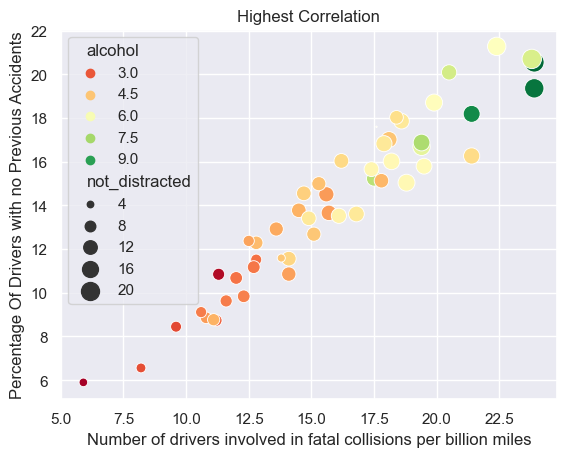

In [17]:
sns.set_theme()
sns.scatterplot(data=df, x='total', y='no_previous', hue='alcohol', palette = "RdYlGn",
               size = 'not_distracted', sizes = (1,200))
plt.ylabel('Percentage Of Drivers with no Previous Accidents')
plt.xlabel('Number of drivers involved in fatal collisions per billion miles')
plt.title('Highest Correlation')
plt.show()
